## 交叉验证 Cross Validation
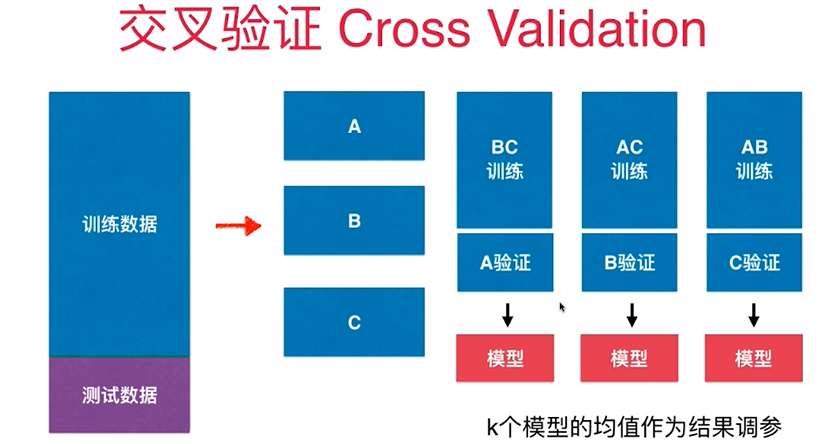

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

## 测试train_test_split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

best_score, best_p, best_k = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 4
Best P = 3
Best Score = 0.9888734353268428


## 使用交叉验证

In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([0.99074074, 0.97685185, 0.99537037, 0.99069767, 0.97209302])

In [7]:
best_score, best_p, best_k = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 2
Best P = 3
Best Score = 0.9879371231696812


In [8]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=4)

best_knn_clf.fit(X_train, y_train)
print(best_knn_clf.score(X_test, y_test))

0.9833101529902643


## 回顾网格搜索

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid = [
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(2, 11)],
        'p': [i for i in range(1, 6)]
    }
]

grid_search = GridSearchCV(knn_clf, param_grid, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=10, p=5,
                                            weights='distance'),
             n_jobs=-1,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=1)

In [11]:
grid_search.best_score_

0.9879371231696812

In [12]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 3, 'weights': 'distance'}

In [13]:
best_knn_clf = grid_search.best_estimator_
best_knn_clf.score(X_test, y_test)

0.9833101529902643

## 总结

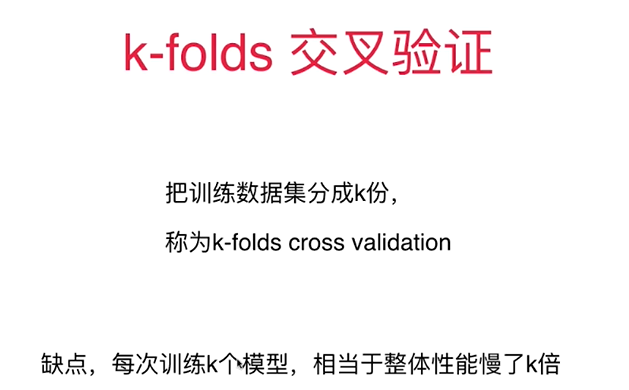

## 留一法 LOO-CV

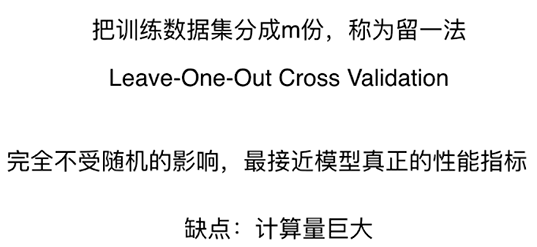